In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import data_table
data_table.enable_dataframe_formatter()

df = pd.read_csv("titanic.csv")

In [28]:
# 1. Data Cleaning
display(df.head())
print("\nDataset Overview:\n")
display(df.info())

# handling missing values

print("Missing Values:\n", df.isnull().sum())

# replacing null values with median in Age column
df.fillna({'Age' : df['Age'].median()}, inplace=True)
# dropping null values in Embarked column
df.dropna(subset=['Embarked'], inplace=True)
# replacing missing values with unknown in Cabin column
df.fillna({'Cabin' : 'Unknown'}, inplace=True)

print("\nMissing Values After Imputation:\n", df.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values After Imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [29]:
# dropping duplicates
df.drop_duplicates(inplace=True)

# using z score to detect outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

# standardizing and encoding category variables
df.loc[:, 'Sex'] = df['Sex'].replace({'male': 'Male', 'female': 'Female'})
df.loc[:, 'Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})
df.loc[:, 'Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [30]:
# 2. Exploratory Data Analysis (EDA):

# univariate
summary_stats = df.describe()
data_table.DataTable(summary_stats)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,445.718826,0.388753,2.314181,29.394462,0.349633,0.255501,25.703621
std,254.817964,0.487765,0.825137,12.131223,0.619951,0.565859,29.733184
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,227.250000,0.000000,2.000000,23.000000,0.000000,0.000000,7.895800
50%,446.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,660.750000,1.000000,3.000000,35.000000,1.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,66.000000,3.000000,2.000000,164.866700


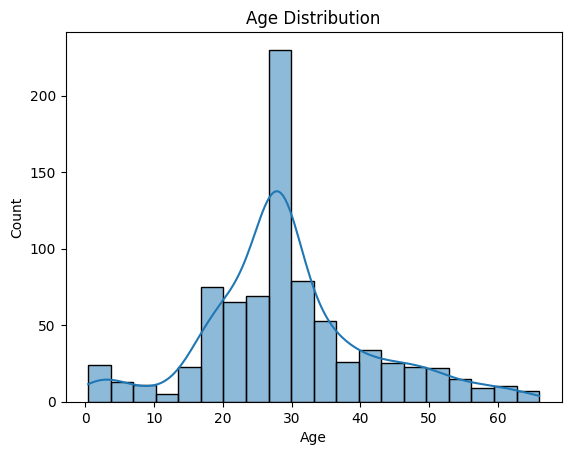

In [31]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

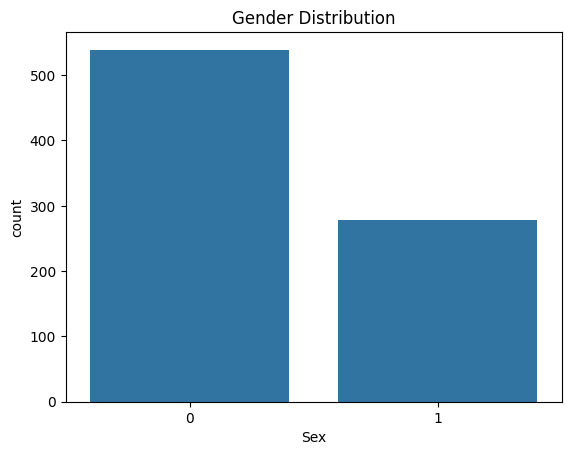

In [32]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

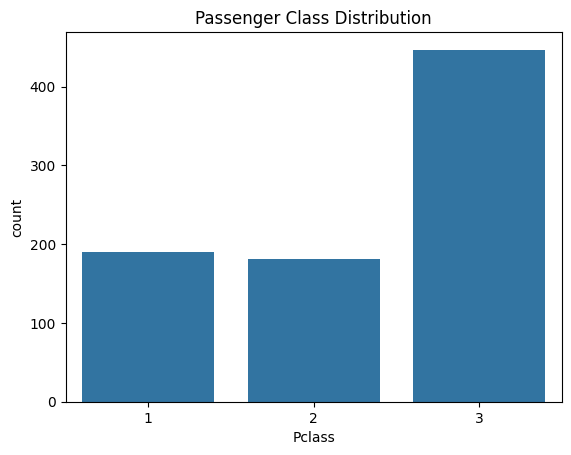

In [33]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

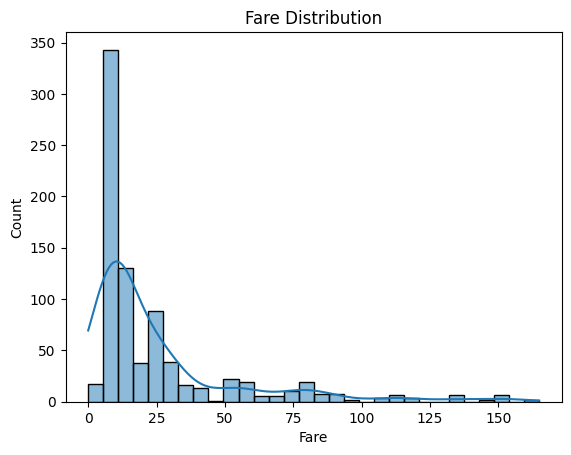

In [34]:
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

In [35]:
# bivariate
numeric_df = df.select_dtypes(include=[np.number])
print("Correlation Matrix:\n", )
display(numeric_df.corr())

Correlation Matrix:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.013921,-0.027859,0.005429,-0.052288,0.005906,-0.005139
Survived,-0.013921,1.000000,-0.319048,-0.091795,0.096403,0.202888,0.326829
Pclass,-0.027859,-0.319048,1.000000,-0.333008,-0.054688,-0.080384,-0.689576
Age,0.005429,-0.091795,-0.333008,1.000000,-0.142306,-0.251148,0.153641
SibSp,-0.052288,0.096403,-0.054688,-0.142306,1.000000,0.306784,0.250832
Parch,0.005906,0.202888,-0.080384,-0.251148,0.306784,1.000000,0.263038
Fare,-0.005139,0.326829,-0.689576,0.153641,0.250832,0.263038,1.000000


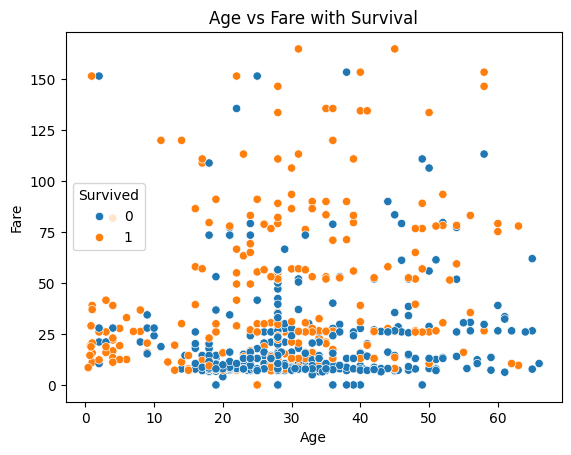

In [36]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare with Survival")
plt.show()

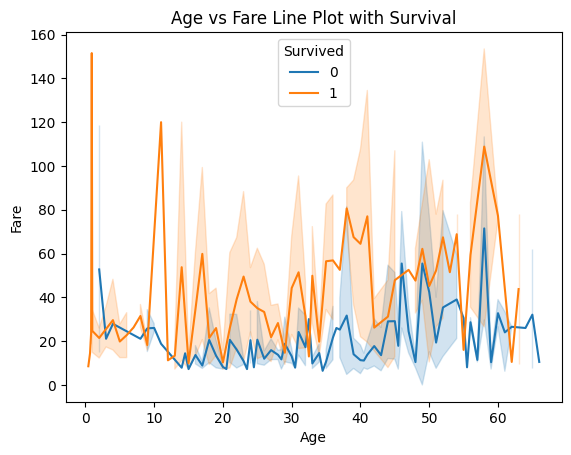

In [37]:
sns.lineplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare Line Plot with Survival")
plt.show()

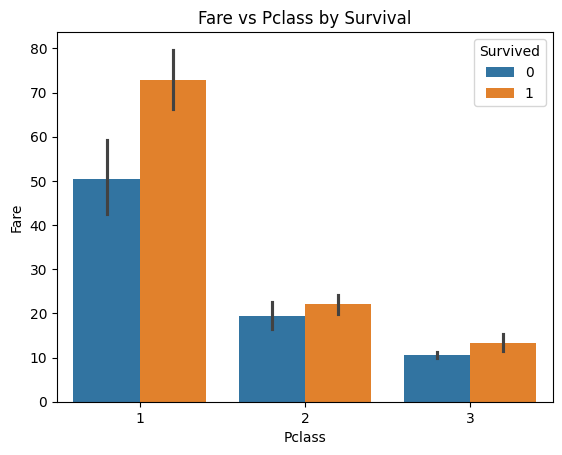

In [38]:
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title("Fare vs Pclass by Survival")
plt.show()

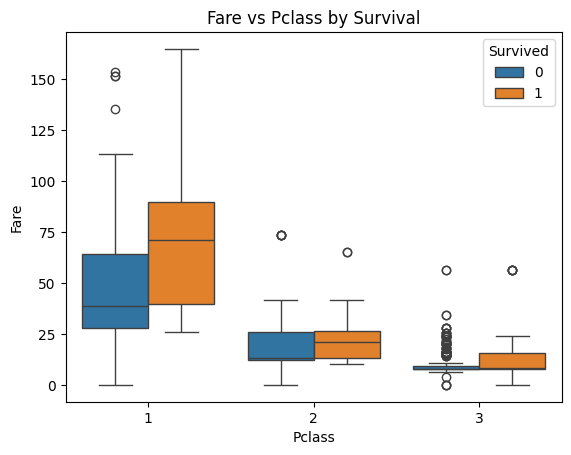

In [39]:
# multivariate
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title("Fare vs Pclass by Survival")
plt.show()

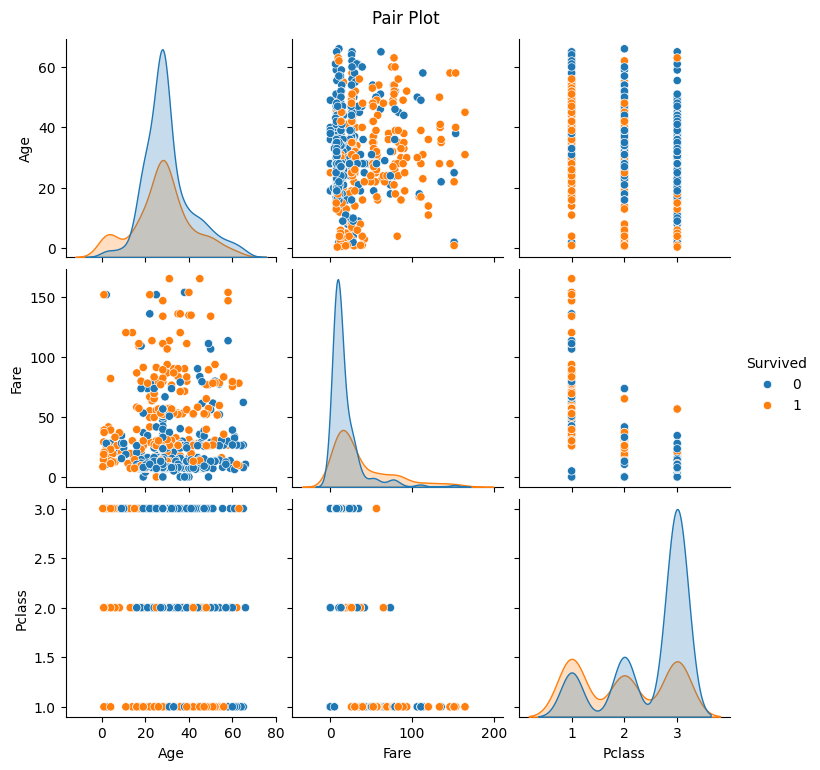

In [40]:
sns.pairplot(df[['Age', 'Fare', 'Survived', 'Pclass']], hue='Survived')
plt.suptitle("Pair Plot", y=1.02)
plt.show()

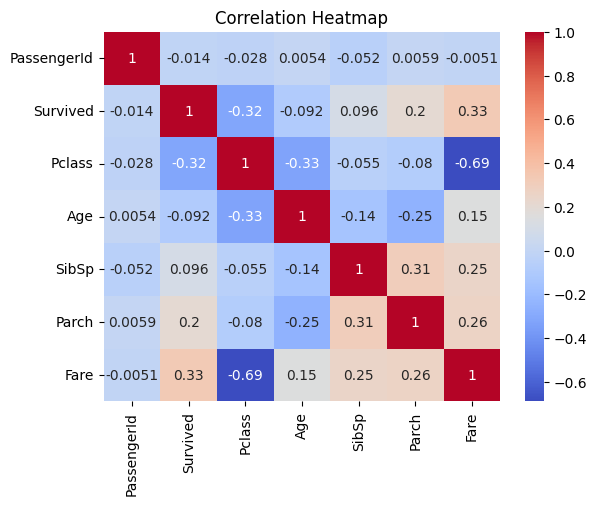

In [41]:
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

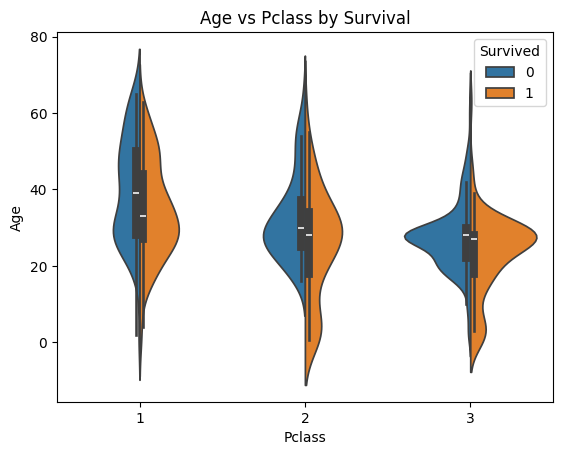

In [42]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title("Age vs Pclass by Survival")
plt.show()

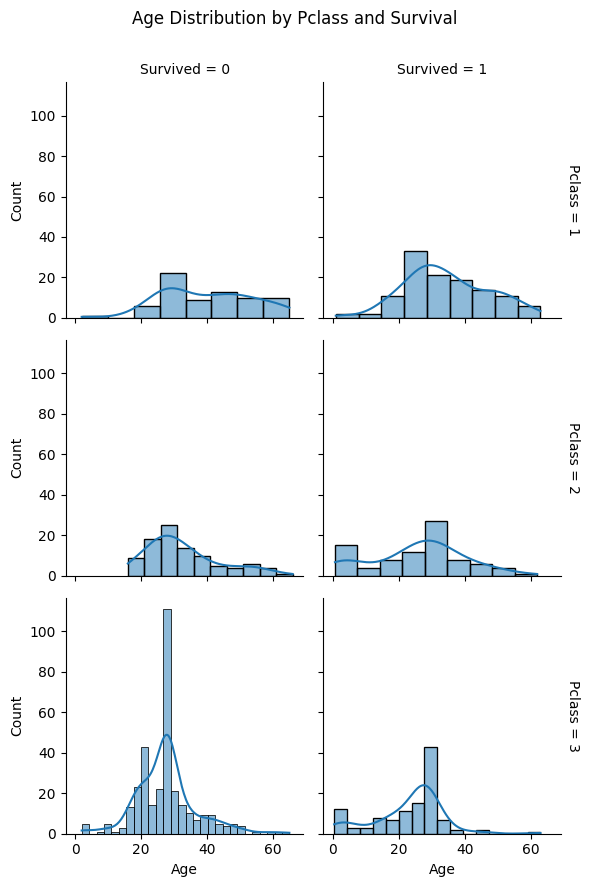

In [43]:
g = sns.FacetGrid(df, col='Survived', row='Pclass', margin_titles=True)
g.map_dataframe(sns.histplot, x='Age', kde=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Age Distribution by Pclass and Survival")
plt.show()

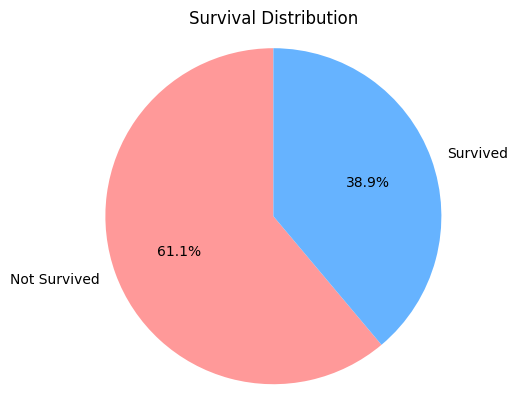

In [44]:
survived_counts = df['Survived'].value_counts()
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title("Survival Distribution")
plt.axis('equal')
plt.show()

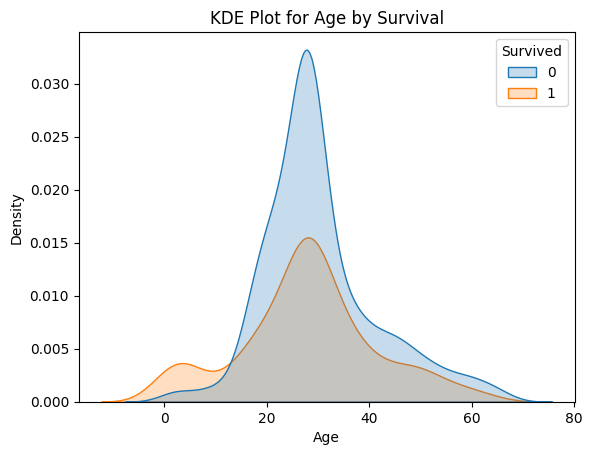

In [45]:
sns.kdeplot(x='Age', hue='Survived', data=df, fill=True)
plt.title("KDE Plot for Age by Survival")
plt.show()